# Importation des librairies

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import warnings
import datetime

# import categorical api 
from pandas.api.types import CategoricalDtype

warnings.filterwarnings("ignore")

# Lecture du fichier data_cleaned_final_sans_dummies.cvs

In [127]:
file = open('../../conf/global_conf.yml', 'r') 
conf = yaml.safe_load(file)

# Définition d'une fonction pointant vers le répertoire des données
def datapath(fich):
    return conf['data_path'] + fich

### Lecture des données

In [128]:
# Lecture des données
fich = conf['local_data_path'] + "data_cleaned_final_sans_dummies.csv"
df = pd.read_csv(fich, index_col = 0, low_memory=False)
#print(df.shape)
#df.info()
df.head()

,jour,mois,an,lum,dep,agg,int,atm,col,lat,...,eq_ceinture,eq_casque,eq_siege,eq_gilet,eq_airbag,eq_gants,eq_indetermine,eq_autre,jour_chome,prox_pt_choc
0,30,11,2019,2.0,93,0,0.0,0.0,2.0,48.896210,...,1,0,0,0,0,0,0,0,1,0
1,30,11,2019,2.0,93,0,0.0,0.0,2.0,48.896210,...,1,0,0,0,0,0,0,0,1,0
2,30,11,2019,2.0,93,0,0.0,0.0,2.0,48.896210,...,1,0,0,0,0,0,0,0,1,1
3,30,11,2019,2.0,93,0,0.0,0.0,6.0,48.930700,...,1,0,0,0,0,0,0,0,1,1
4,28,11,2019,0.0,92,0,0.0,0.0,4.0,48.935872,...,1,0,0,0,0,0,0,0,1,1


# Etude des série temporelle sur les mois

In [129]:
df_mois = df[['an', 'mois', 'grav_rec']]
df_mois.head()

,an,mois,grav_rec
0,2019,11,Blessé léger
1,2019,11,Blessé léger
2,2019,11,Indemne
3,2019,11,Blessé léger
4,2019,11,Indemne


In [130]:
y_m = df_mois['an'].astype('str') + "-" + df_mois['mois'].astype('str')
df_mois.insert(loc = 0, column = 'y_m', value = y_m)
df_mois['y_m'] = pd.to_datetime(df_mois['y_m'])
df_mois.head()

,y_m,an,mois,grav_rec
0,2019-11-01,2019,11,Blessé léger
1,2019-11-01,2019,11,Blessé léger
2,2019-11-01,2019,11,Indemne
3,2019-11-01,2019,11,Blessé léger
4,2019-11-01,2019,11,Indemne


In [131]:
df_mois = df_mois.drop(['an', 'mois'], axis = 1)
df_mois.head()

,y_m,grav_rec
0,2019-11-01,Blessé léger
1,2019-11-01,Blessé léger
2,2019-11-01,Indemne
3,2019-11-01,Blessé léger
4,2019-11-01,Indemne


In [132]:
df_mois['grav_rec'].unique()

array(['Blessé léger', 'Indemne', 'Blessé hospitalisé', 'Tué'],
      dtype=object)

### Création du dataframe pour tués

In [133]:
df_tues = df_mois[df_mois["grav_rec"] == 'Tué']
df_tues['grav_rec'] = 1
df_tues = df_tues[['y_m', 'grav_rec']].groupby('y_m').sum().reset_index()
df_tues.head()

,y_m,grav_rec
0,2019-01-01,246
1,2019-02-01,254
2,2019-03-01,267
3,2019-04-01,243
4,2019-05-01,243


In [134]:
df_tues['an'] = df_tues['y_m'].dt.year
df_tues['mois'] = df_tues['y_m'].dt.month
df_tues.head()

,y_m,grav_rec,an,mois
0,2019-01-01,246,2019,1
1,2019-02-01,254,2019,2
2,2019-03-01,267,2019,3
3,2019-04-01,243,2019,4
4,2019-05-01,243,2019,5


In [135]:
df_tues_moy = df_tues[['mois', 'grav_rec']].groupby('mois').mean().reset_index()
df_tues_moy.head()

,mois,grav_rec
0,1,241.50
1,2,221.25
2,3,212.50
3,4,201.00
4,5,242.00


### Création du dataframe pour blessés hospitalisés

In [136]:
df_blesses_h = df_mois[df_mois["grav_rec"] == 'Blessé hospitalisé']
df_blesses_h['grav_rec'] = 1
df_blesses_h = df_blesses_h[['y_m', 'grav_rec']].groupby('y_m').sum().reset_index()
df_blesses_h.head()

,y_m,grav_rec
0,2019-01-01,1316
1,2019-02-01,1402
2,2019-03-01,1505
3,2019-04-01,1458
4,2019-05-01,1623


In [137]:
df_blesses_h['an'] = df_blesses_h['y_m'].dt.year
df_blesses_h['mois'] = df_blesses_h['y_m'].dt.month
df_blesses_h.head()

,y_m,grav_rec,an,mois
0,2019-01-01,1316,2019,1
1,2019-02-01,1402,2019,2
2,2019-03-01,1505,2019,3
3,2019-04-01,1458,2019,4
4,2019-05-01,1623,2019,5


In [138]:
df_blesses_h_moy = df_blesses_h[['mois', 'grav_rec']].groupby(['mois']).mean().reset_index()
df_blesses_h_moy

,mois,grav_rec
0,1,1225.75
1,2,1196.25
2,3,1192.00
3,4,1104.00
4,5,1528.00
5,6,1755.00
6,7,1878.00
7,8,1728.50
8,9,1700.00
9,10,1601.75


### Création du dataframe pour blessés légers

In [139]:
df_blesses_l = df_mois[df_mois["grav_rec"] == 'Blessé léger']
df_blesses_l['grav_rec'] = 1
df_blesses_l = df_blesses_l[['y_m', 'grav_rec']].groupby('y_m').sum().reset_index()
df_blesses_l.head()

,y_m,grav_rec
0,2019-01-01,3635
1,2019-02-01,3481
2,2019-03-01,3966
3,2019-04-01,3859
4,2019-05-01,4049


In [140]:
df_blesses_l['an'] = df_blesses_l['y_m'].dt.year
df_blesses_l['mois'] = df_blesses_l['y_m'].dt.month
df_blesses_l.head()

,y_m,grav_rec,an,mois
0,2019-01-01,3635,2019,1
1,2019-02-01,3481,2019,2
2,2019-03-01,3966,2019,3
3,2019-04-01,3859,2019,4
4,2019-05-01,4049,2019,5


In [141]:
df_blesses_l_moy = df_blesses_l[['mois', 'grav_rec']].groupby(['mois']).mean().reset_index()
df_blesses_l_moy

,mois,grav_rec
0,1,3526.25
1,2,3277.00
2,3,3294.00
3,4,2824.25
4,5,3704.25
5,6,4327.75
6,7,4389.25
7,8,3627.75
8,9,4345.50
9,10,4362.75


### Création du dataframe pour indemnes

In [142]:
df_indemnes = df_mois[df_mois["grav_rec"] == 'Indemne']
df_indemnes['grav_rec'] = 1
df_indemnes = df_indemnes[['y_m', 'grav_rec']].groupby('y_m').sum().reset_index()
df_indemnes.head()

,y_m,grav_rec
0,2019-01-01,3812
1,2019-02-01,3777
2,2019-03-01,4071
3,2019-04-01,3967
4,2019-05-01,4183


In [143]:
df_indemnes['an'] = df_indemnes['y_m'].dt.year
df_indemnes['mois'] = df_indemnes['y_m'].dt.month
df_indemnes.head()

,y_m,grav_rec,an,mois
0,2019-01-01,3812,2019,1
1,2019-02-01,3777,2019,2
2,2019-03-01,4071,2019,3
3,2019-04-01,3967,2019,4
4,2019-05-01,4183,2019,5


In [144]:
df_indemnes_moy = df_indemnes[['mois', 'grav_rec']].groupby(['mois']).mean().reset_index()
df_indemnes_moy

,mois,grav_rec
0,1,3555.25
1,2,3414.00
2,3,3323.75
3,4,2881.50
4,5,3816.75
5,6,4431.50
6,7,4459.50
7,8,3798.25
8,9,4492.50
9,10,4435.75


### Visualisation de l'influence des mois sur la gravité des accidents

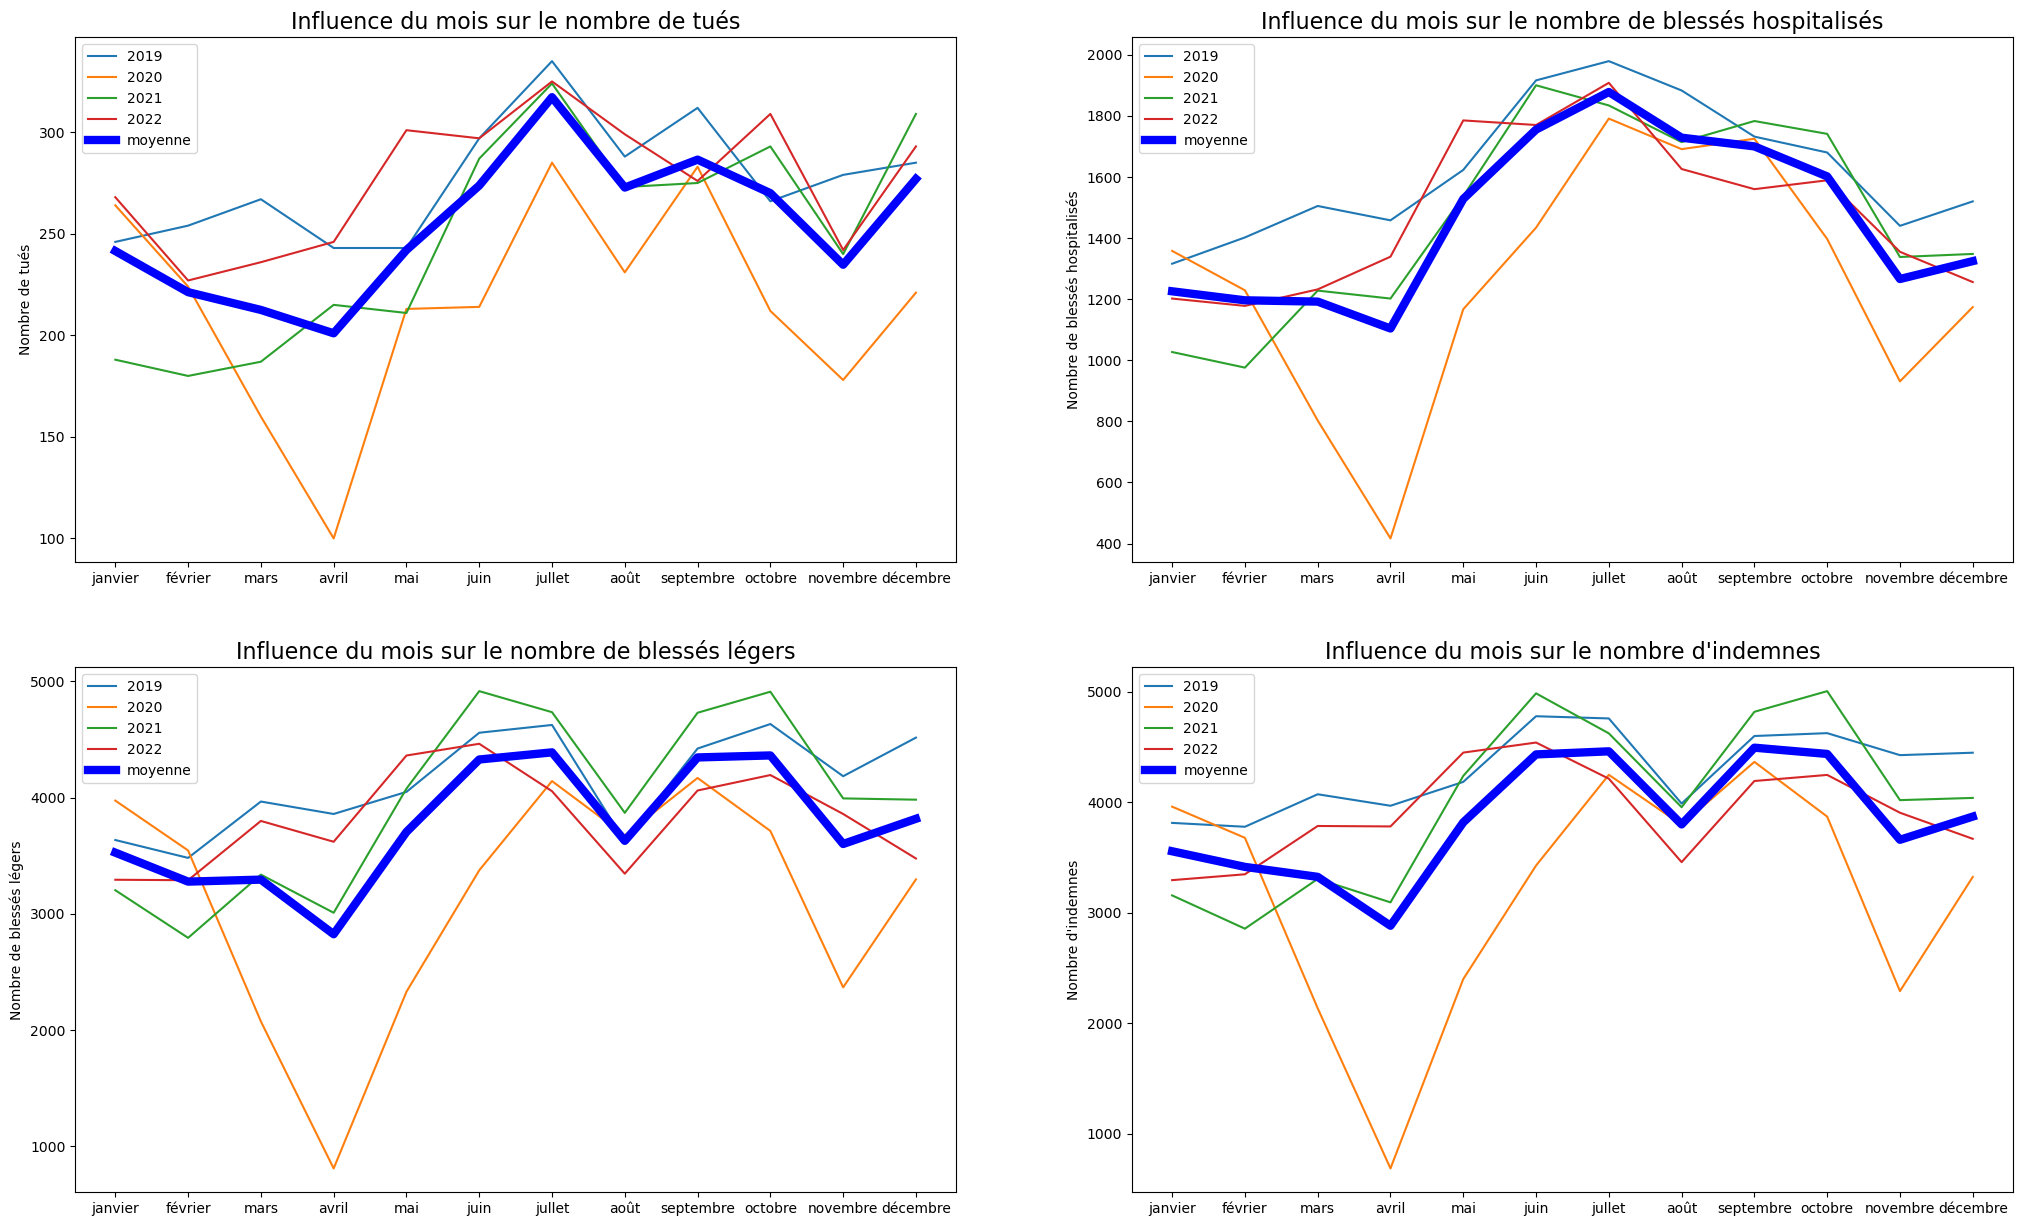

In [145]:
plt.figure(figsize = (25, 15))


#Courbe pour tués
yrs = df_tues['an'].unique()
mths = df_tues['mois'].unique()

for i in yrs :
    plt.subplot(2, 2, 1)
    df_tues2 = df_tues.loc[(df_tues['an'] == i)]
    plt.plot(df_tues2['mois'], df_tues2['grav_rec'], label = i)
plt.plot(df_tues_moy['mois'], df_tues_moy['grav_rec'], label = 'moyenne', color = "b", linewidth = 6)
plt.xticks(np.arange(1, 13, 1), ['janvier','février', 'mars', 'avril', 'mai', 'juin', 'jullet', 'août', 'septembre', 'octobre', 'novembre', 'décembre'])
plt.ylabel('Nombre de tués')
plt.title('Influence du mois sur le nombre de tués', fontdict = {'fontsize' : 16})
plt.legend(loc = 'upper left')


#Courbe pour blessés hospitalisés
yrs = df_blesses_h['an'].unique()
mths = df_blesses_h['mois'].unique()

for i in yrs :
    plt.subplot(2, 2, 2)
    df_blesses_h2 = df_blesses_h.loc[(df_tues['an'] == i)]
    plt.plot(df_blesses_h2['mois'], df_blesses_h2['grav_rec'], label = i)
plt.plot(df_blesses_h_moy['mois'], df_blesses_h_moy['grav_rec'], label = 'moyenne', color = "b", linewidth = 6)
plt.xticks(np.arange(1, 13, 1), ['janvier','février', 'mars', 'avril', 'mai', 'juin', 'jullet', 'août', 'septembre', 'octobre', 'novembre', 'décembre'])
plt.ylabel('Nombre de blessés hospitalisés')
plt.title('Influence du mois sur le nombre de blessés hospitalisés', fontdict = {'fontsize' : 16})
plt.legend(loc = 'upper left')


#Courble pour blessés légers
yrs = df_blesses_l['an'].unique()
mths = df_blesses_l['mois'].unique()

for i in yrs :
    plt.subplot(2, 2, 3)
    df_blesses_l2 = df_blesses_l.loc[(df_tues['an'] == i)]
    plt.plot(df_blesses_l2['mois'], df_blesses_l2['grav_rec'], label = i)
plt.plot(df_blesses_l_moy['mois'], df_blesses_l_moy['grav_rec'], label = 'moyenne', color = "b", linewidth = 6)
plt.xticks(np.arange(1, 13, 1), ['janvier','février', 'mars', 'avril', 'mai', 'juin', 'jullet', 'août', 'septembre', 'octobre', 'novembre', 'décembre'])
plt.ylabel('Nombre de blessés légers')
plt.title('Influence du mois sur le nombre de blessés légers', fontdict = {'fontsize' : 16})
plt.legend(loc = 'upper left')
    

#Courbe pour indemne
yrs = df_indemnes['an'].unique()
mths = df_indemnes['mois'].unique()

for i in yrs :
    plt.subplot(2, 2, 4)
    df_indemnes2 = df_indemnes.loc[(df_tues['an'] == i)]
    plt.plot(df_indemnes2['mois'], df_indemnes2['grav_rec'], label = i)
plt.plot(df_indemnes_moy['mois'], df_indemnes_moy['grav_rec'], label = 'moyenne', color = "b", linewidth = 6)
plt.xticks(np.arange(1, 13, 1), ['janvier','février', 'mars', 'avril', 'mai', 'juin', 'jullet', 'août', 'septembre', 'octobre', 'novembre', 'décembre'])
plt.ylabel("Nombre d'indemnes")
plt.title("Influence du mois sur le nombre d'indemnes", fontdict = {'fontsize' : 16})
plt.legend(loc = 'upper left')
 
plt.show()

On voit une saisonnalité au niveau des mois. La différence pour l'année 2020 s'explique par les confinements : confinement strict du 17 mars au 11 mai et confinement moins strict du 30 octobre au 15 décembre.

# Etude des série temporelle sur les jours

In [146]:
df_jours = df[['an', 'mois', 'jour', 'grav_rec']]
df_jours.head()

,an,mois,jour,grav_rec
0,2019,11,30,Blessé léger
1,2019,11,30,Blessé léger
2,2019,11,30,Indemne
3,2019,11,30,Blessé léger
4,2019,11,28,Indemne


In [147]:
y_m_j = df_jours['an'].astype('str') + "-" + df_jours['mois'].astype('str') + "-" + df_jours['jour'].astype('str')
df_jours.insert(loc = 0, column = 'y_m_j', value = y_m_j)
df_jours['y_m_j'] = pd.to_datetime(df_jours['y_m_j'])
df_jours.head()

,y_m_j,an,mois,jour,grav_rec
0,2019-11-30,2019,11,30,Blessé léger
1,2019-11-30,2019,11,30,Blessé léger
2,2019-11-30,2019,11,30,Indemne
3,2019-11-30,2019,11,30,Blessé léger
4,2019-11-28,2019,11,28,Indemne


In [148]:
df_jours['jour_semaine'] = df_jours['y_m_j'].dt.weekday
df_jours

,y_m_j,an,mois,jour,grav_rec,jour_semaine
0,2019-11-30,2019,11,30,Blessé léger,5
1,2019-11-30,2019,11,30,Blessé léger,5
2,2019-11-30,2019,11,30,Indemne,5
3,2019-11-30,2019,11,30,Blessé léger,5
4,2019-11-28,2019,11,28,Indemne,3
...,...,...,...,...,...,...
494177,2022-01-01,2022,1,1,Indemne,5
494178,2022-01-01,2022,1,1,Blessé hospitalisé,5
494179,2022-01-01,2022,1,1,Blessé léger,5
494180,2022-03-01,2022,3,1,Blessé hospitalisé,1


In [149]:
y_m_js = df_jours['an'].astype('str') + "-" + df_jours['mois'].astype('str') + "-" + df_jours['jour_semaine'].astype('str')
df_jours.insert(loc = 0, column = 'y_m_js', value = y_m_js)
df_jours.head()

,y_m_js,y_m_j,an,mois,jour,grav_rec,jour_semaine
0,2019-11-5,2019-11-30,2019,11,30,Blessé léger,5
1,2019-11-5,2019-11-30,2019,11,30,Blessé léger,5
2,2019-11-5,2019-11-30,2019,11,30,Indemne,5
3,2019-11-5,2019-11-30,2019,11,30,Blessé léger,5
4,2019-11-3,2019-11-28,2019,11,28,Indemne,3


In [150]:
df_jours = df_jours.drop(['an', 'jour', 'mois', 'jour_semaine', 'y_m_j'], axis = 1)
df_jours.head()

,y_m_js,grav_rec
0,2019-11-5,Blessé léger
1,2019-11-5,Blessé léger
2,2019-11-5,Indemne
3,2019-11-5,Blessé léger
4,2019-11-3,Indemne


### Création du dataframe pour tués

In [151]:
df_tues = df_jours[df_jours["grav_rec"] == 'Tué']
df_tues['grav_rec'] = 1
df_tues = df_tues[['y_m_js', 'grav_rec']].groupby('y_m_js').sum().reset_index()
df_tues.head()

,y_m_js,grav_rec
0,2019-1-0,25
1,2019-1-1,48
2,2019-1-2,36
3,2019-1-3,38
4,2019-1-4,26


In [152]:
df_tues['an'] = df_tues['y_m_js'].apply(lambda x : x.split("-")[0])
df_tues['mois'] = df_tues['y_m_js'].apply(lambda x : x.split("-")[1])
df_tues['jour_semaine'] = df_tues['y_m_js'].apply(lambda x : x.split("-")[2])
df_tues = df_tues.drop('y_m_js', axis = 1)
df_tues = df_tues.astype('int')
df_tues.head()

,grav_rec,an,mois,jour_semaine
0,25,2019,1,0
1,48,2019,1,1
2,36,2019,1,2
3,38,2019,1,3
4,26,2019,1,4


In [153]:
df_tues = df_tues[['an', 'jour_semaine', 'grav_rec']].groupby(['an','jour_semaine']).sum().reset_index()
df_tues.head()

,an,jour_semaine,grav_rec
0,2019,0,413
1,2019,1,376
2,2019,2,439
3,2019,3,449
4,2019,4,524


In [154]:
df_tues_moy = df_tues[['jour_semaine', 'grav_rec']].groupby('jour_semaine').mean().reset_index()
df_tues_moy

,jour_semaine,grav_rec
0,0,373.25
1,1,370.00
2,2,410.50
3,3,400.50
4,4,485.75
5,5,523.50
6,6,486.75


### Création du dataframe pour blessés hospitalisés

In [155]:
df_blesses_h = df_jours[df_jours["grav_rec"] == 'Blessé hospitalisé']
df_blesses_h['grav_rec'] = 1
df_blesses_h = df_blesses_h[['y_m_js', 'grav_rec']].groupby('y_m_js').sum().reset_index()
df_blesses_h.head()

,y_m_js,grav_rec
0,2019-1-0,153
1,2019-1-1,209
2,2019-1-2,187
3,2019-1-3,219
4,2019-1-4,206


In [156]:
df_blesses_h['an'] = df_blesses_h['y_m_js'].apply(lambda x : x.split("-")[0])
df_blesses_h['mois'] = df_blesses_h['y_m_js'].apply(lambda x : x.split("-")[1])
df_blesses_h['jour_semaine'] = df_blesses_h['y_m_js'].apply(lambda x : x.split("-")[2])
df_blesses_h = df_blesses_h.drop('y_m_js', axis = 1)
df_blesses_h = df_blesses_h.astype('int')
df_blesses_h.head()

,grav_rec,an,mois,jour_semaine
0,153,2019,1,0
1,209,2019,1,1
2,187,2019,1,2
3,219,2019,1,3
4,206,2019,1,4


In [157]:
df_blesses_h = df_blesses_h[['an', 'jour_semaine', 'grav_rec']].groupby(['an','jour_semaine']).sum().reset_index()
df_blesses_h.head()

,an,jour_semaine,grav_rec
0,2019,0,2370
1,2019,1,2553
2,2019,2,2563
3,2019,3,2606
4,2019,4,3215


In [158]:
df_blesses_h_moy = df_blesses_h[['jour_semaine', 'grav_rec']].groupby('jour_semaine').mean().reset_index()
df_blesses_h_moy

,jour_semaine,grav_rec
0,0,2169.00
1,1,2270.00
2,2,2323.75
3,3,2362.75
4,4,2855.75
5,5,2878.25
6,6,2640.25


### Création du dataframe pour blessés légers

In [159]:
df_blesses_l = df_jours[df_jours["grav_rec"] == 'Blessé léger']
df_blesses_l['grav_rec'] = 1
df_blesses_l = df_blesses_l[['y_m_js', 'grav_rec']].groupby('y_m_js').sum().reset_index()
df_blesses_l.head()

,y_m_js,grav_rec
0,2019-1-0,491
1,2019-1-1,596
2,2019-1-2,575
3,2019-1-3,560
4,2019-1-4,592


In [160]:
df_blesses_l['an'] = df_blesses_l['y_m_js'].apply(lambda x : x.split("-")[0])
df_blesses_l['mois'] = df_blesses_l['y_m_js'].apply(lambda x : x.split("-")[1])
df_blesses_l['jour_semaine'] = df_blesses_l['y_m_js'].apply(lambda x : x.split("-")[2])
df_blesses_l = df_blesses_l.drop('y_m_js', axis = 1)
df_blesses_l = df_blesses_l.astype('int')
df_blesses_l.head()

,grav_rec,an,mois,jour_semaine
0,491,2019,1,0
1,596,2019,1,1
2,575,2019,1,2
3,560,2019,1,3
4,592,2019,1,4


In [161]:
df_blesses_l = df_blesses_l[['an', 'jour_semaine', 'grav_rec']].groupby(['an','jour_semaine']).sum().reset_index()
df_blesses_l.head()

,an,jour_semaine,grav_rec
0,2019,0,6730
1,2019,1,7220
2,2019,2,6897
3,2019,3,7095
4,2019,4,8247


In [162]:
df_blesses_l_moy = df_blesses_l[['jour_semaine', 'grav_rec']].groupby('jour_semaine').mean().reset_index()
df_blesses_l_moy

,jour_semaine,grav_rec
0,0,6108.50
1,1,6491.50
2,2,6462.50
3,3,6484.75
4,4,7354.00
5,5,6573.75
6,6,5622.00


### Création du dataframe pour indemnes

In [163]:
df_indemnes = df_jours[df_jours["grav_rec"] == 'Indemne']
df_indemnes['grav_rec'] = 1
df_indemnes = df_indemnes[['y_m_js', 'grav_rec']].groupby('y_m_js').sum().reset_index()
df_indemnes.head()

,y_m_js,grav_rec
0,2019-1-0,522
1,2019-1-1,582
2,2019-1-2,612
3,2019-1-3,632
4,2019-1-4,629


In [164]:
df_indemnes['an'] = df_indemnes['y_m_js'].apply(lambda x : x.split("-")[0])
df_indemnes['mois'] = df_indemnes['y_m_js'].apply(lambda x : x.split("-")[1])
df_indemnes['jour_semaine'] = df_indemnes['y_m_js'].apply(lambda x : x.split("-")[2])
df_indemnes = df_indemnes.drop('y_m_js', axis = 1)
df_indemnes = df_indemnes.astype('int')
df_indemnes.head()

,grav_rec,an,mois,jour_semaine
0,522,2019,1,0
1,582,2019,1,1
2,612,2019,1,2
3,632,2019,1,3
4,629,2019,1,4


In [165]:
df_indemnes = df_indemnes[['an', 'jour_semaine', 'grav_rec']].groupby(['an','jour_semaine']).sum().reset_index()
df_indemnes.head()

,an,jour_semaine,grav_rec
0,2019,0,6955
1,2019,1,7518
2,2019,2,7178
3,2019,3,7710
4,2019,4,8958


In [166]:
df_indemnes_moy = df_indemnes[['jour_semaine', 'grav_rec']].groupby('jour_semaine').mean().reset_index()
df_indemnes_moy

,jour_semaine,grav_rec
0,0,6290.25
1,1,6733.50
2,2,6689.25
3,3,6807.75
4,4,7722.25
5,5,6584.75
6,6,5309.25


### Visualisation de l'influence des jours sur la gravité des accidents

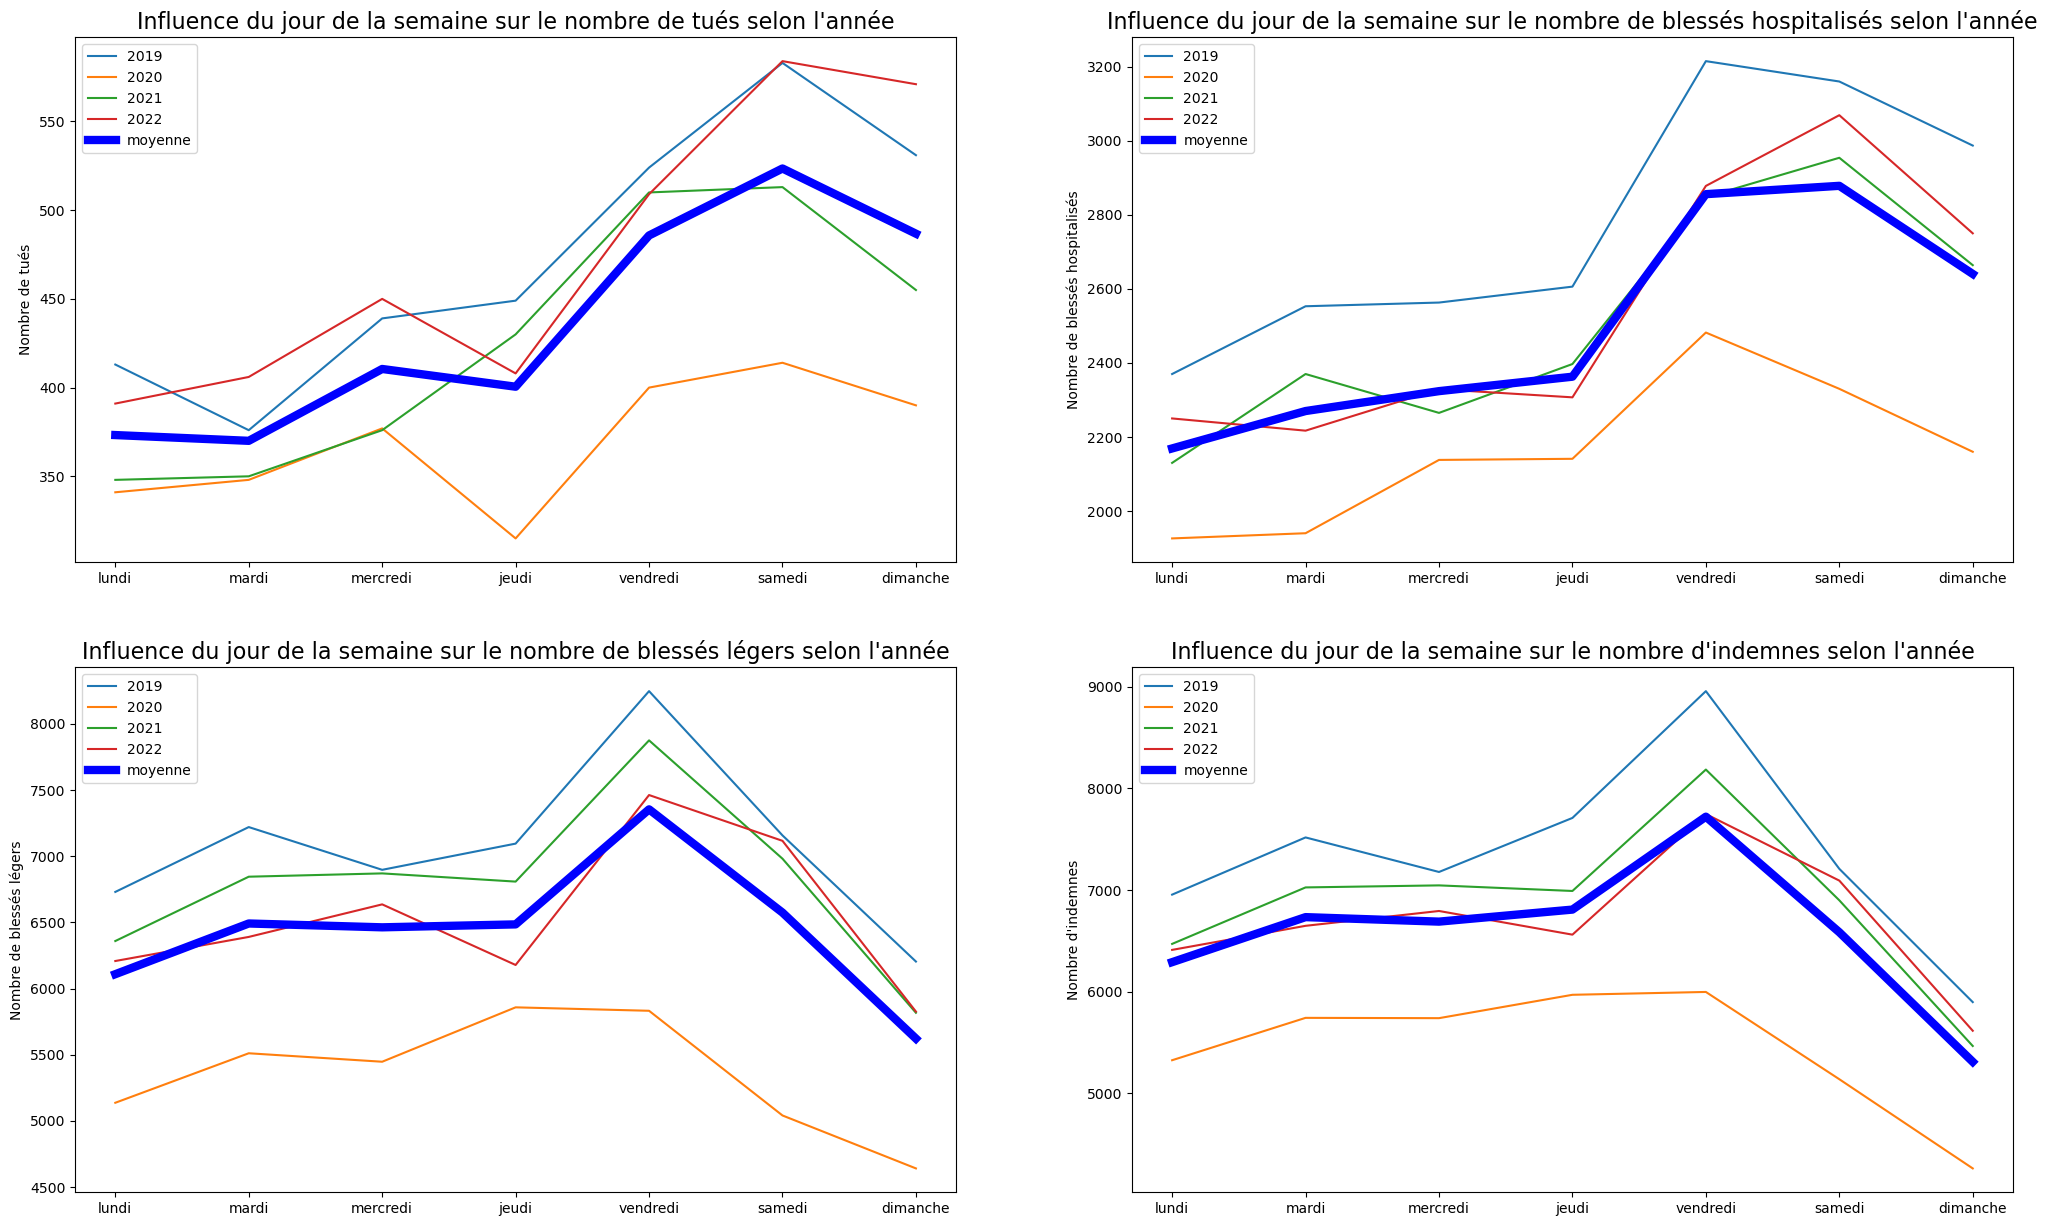

In [167]:
plt.figure(figsize = (25, 15))

#Courbe pour tués
yrs = df_tues['an'].unique()
days = df_tues['jour_semaine'].unique()
color = plt.cm.inferno(np.linspace(0, 1, len(mths)))

for i in yrs :
    plt.subplot(2, 2, 1)
    df_tues2 = df_tues.loc[(df_tues['an'] == i)]
    plt.plot(df_tues2['jour_semaine'], df_tues2['grav_rec'], label = i)
plt.plot(df_tues_moy['jour_semaine'], df_tues_moy['grav_rec'], label = 'moyenne', color = "b", linewidth = 6)
plt.xticks(np.arange(0, 7, 1), ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche'])
plt.ylabel('Nombre de tués')
plt.title("Influence du jour de la semaine sur le nombre de tués selon l'année", fontdict = {'fontsize' : 16})
plt.legend(loc = 'upper left')
 

#Courbe pour blessés hospitalisés
yrs = df_blesses_h['an'].unique()
days = df_blesses_h['jour_semaine'].unique()
color = plt.cm.inferno(np.linspace(0, 1, len(mths)))

for i in yrs :
    plt.subplot(2, 2, 2)
    df_blesses_h2 = df_blesses_h.loc[(df_blesses_h['an'] == i)]
    plt.plot(df_blesses_h2['jour_semaine'], df_blesses_h2['grav_rec'], label = i)
plt.plot(df_blesses_h_moy['jour_semaine'], df_blesses_h_moy['grav_rec'], label = 'moyenne', color = "b", linewidth = 6)
plt.xticks(np.arange(0, 7, 1), ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche'])
plt.ylabel('Nombre de blessés hospitalisés')
plt.title("Influence du jour de la semaine sur le nombre de blessés hospitalisés selon l'année", fontdict = {'fontsize' : 16})
plt.legend(loc = 'upper left')
  

#Courbe pour blessés légers
yrs = df_blesses_l['an'].unique()
days = df_blesses_l['jour_semaine'].unique()
color = plt.cm.inferno(np.linspace(0, 1, len(mths)))

for i in yrs :
    plt.subplot(2, 2, 3)
    df_blesses_l2 = df_blesses_l.loc[(df_blesses_l['an'] == i)]
    plt.plot(df_blesses_l2['jour_semaine'], df_blesses_l2['grav_rec'], label = i)
plt.plot(df_blesses_l_moy['jour_semaine'], df_blesses_l_moy['grav_rec'], label = 'moyenne', color = "b", linewidth = 6)
plt.xticks(np.arange(0, 7, 1), ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche'])
plt.ylabel('Nombre de blessés légers')
plt.title("Influence du jour de la semaine sur le nombre de blessés légers selon l'année", fontdict = {'fontsize' : 16})
plt.legend(loc = 'upper left')


#Courbe pour les indemnes
yrs = df_indemnes['an'].unique()
days = df_indemnes['jour_semaine'].unique()
color = plt.cm.inferno(np.linspace(0, 1, len(mths)))

for i in yrs :
    plt.subplot(2, 2, 4)
    df_indemnes2 = df_indemnes.loc[(df_tues['an'] == i)]
    plt.plot(df_indemnes2['jour_semaine'], df_indemnes2['grav_rec'], label = i)
plt.plot(df_indemnes_moy['jour_semaine'], df_indemnes_moy['grav_rec'], label = 'moyenne', color = "b", linewidth = 6)
plt.xticks(np.arange(0, 7, 1), ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche'])
plt.ylabel("Nombre d'indemnes")
plt.title("Influence du jour de la semaine sur le nombre d'indemnes selon l'année", fontdict = {'fontsize' : 16})
plt.legend(loc = 'upper left')
 
plt.show()

On voit que les accidnets semblent plus grave le week-end. On note une augmentation des tués et des blessés hospitalisés alors que les blessés légers et les indemnes dimiuent le samedi et le dimanche.

# Etude des séries temporelles sur les heures

In [168]:
df_heures = df[['an', 'mois', 'jour', 'heure', 'grav_rec']]
df_heures.head()

,an,mois,jour,heure,grav_rec
0,2019,11,30,1,Blessé léger
1,2019,11,30,1,Blessé léger
2,2019,11,30,1,Indemne
3,2019,11,30,2,Blessé léger
4,2019,11,28,15,Indemne


In [169]:
y_m_j_h = df_heures['an'].astype('str') + "-" + df_heures['mois'].astype('str') + "-" + df_heures['jour'].astype('str') + " " + df_heures['heure'].astype('str') + ":" + "00" + ":" + "00"
df_heures.insert(loc = 0, column = 'y_m_j_h', value = y_m_j_h)
df_heures['y_m_j_h'] = pd.to_datetime(df_heures['y_m_j_h'])
df_heures.head()

,y_m_j_h,an,mois,jour,heure,grav_rec
0,2019-11-30 01:00:00,2019,11,30,1,Blessé léger
1,2019-11-30 01:00:00,2019,11,30,1,Blessé léger
2,2019-11-30 01:00:00,2019,11,30,1,Indemne
3,2019-11-30 02:00:00,2019,11,30,2,Blessé léger
4,2019-11-28 15:00:00,2019,11,28,15,Indemne


In [170]:
df_heures = df_heures.drop(['an', 'jour', 'mois', 'heure'], axis = 1)
df_heures.head()

,y_m_j_h,grav_rec
0,2019-11-30 01:00:00,Blessé léger
1,2019-11-30 01:00:00,Blessé léger
2,2019-11-30 01:00:00,Indemne
3,2019-11-30 02:00:00,Blessé léger
4,2019-11-28 15:00:00,Indemne


### Création du dataframe pour tués

In [171]:
df_tues = df_heures[df_heures["grav_rec"] == 'Tué']
df_tues['grav_rec'] = 1
df_tues = df_tues[['y_m_j_h', 'grav_rec']].groupby('y_m_j_h').sum().reset_index()
df_tues.head()

,y_m_j_h,grav_rec
0,2019-01-01 00:00:00,2
1,2019-01-01 01:00:00,2
2,2019-01-01 02:00:00,2
3,2019-01-01 04:00:00,1
4,2019-01-01 07:00:00,2


In [172]:
df_tues['an'] = df_tues['y_m_j_h'].dt.year
df_tues['mois'] = df_tues['y_m_j_h'].dt.month
df_tues['jour'] = df_tues['y_m_j_h'].dt.day
df_tues['heure'] = df_tues['y_m_j_h'].dt.hour
df_tues = df_tues.drop('y_m_j_h', axis = 1)
df_tues = df_tues.astype('int')
df_tues.head()

,grav_rec,an,mois,jour,heure
0,2,2019,1,1,0
1,2,2019,1,1,1
2,2,2019,1,1,2
3,1,2019,1,1,4
4,2,2019,1,1,7


In [173]:
df_tues = df_tues[['an', 'heure', 'grav_rec']].groupby(['an','heure']).sum().reset_index()
df_tues.head()

,an,heure,grav_rec
0,2019,0,105
1,2019,1,100
2,2019,2,82
3,2019,3,75
4,2019,4,76


In [174]:
df_tues_moy = df_tues[['heure', 'grav_rec']].groupby('heure').mean().reset_index()
df_tues_moy

,heure,grav_rec
0,0,90.50
1,1,89.75
2,2,79.25
3,3,69.25
4,4,64.50
5,5,94.00
6,6,92.25
7,7,118.50
8,8,125.25
9,9,126.25


### Création du dataframe pour blessés hospitalisés

In [175]:
df_blesses_h = df_heures[df_heures["grav_rec"] == 'Blessé hospitalisé']
df_blesses_h['grav_rec'] = 1
df_blesses_h = df_blesses_h[['y_m_j_h', 'grav_rec']].groupby('y_m_j_h').sum().reset_index()
df_blesses_h.head()

,y_m_j_h,grav_rec
0,2019-01-01 00:00:00,5
1,2019-01-01 01:00:00,4
2,2019-01-01 02:00:00,4
3,2019-01-01 03:00:00,1
4,2019-01-01 04:00:00,2


In [176]:
df_blesses_h['an'] = df_blesses_h['y_m_j_h'].dt.year
df_blesses_h['mois'] = df_blesses_h['y_m_j_h'].dt.month
df_blesses_h['jour'] = df_blesses_h['y_m_j_h'].dt.day
df_blesses_h['heure'] = df_blesses_h['y_m_j_h'].dt.hour
df_blesses_h = df_blesses_h.drop('y_m_j_h', axis = 1)
df_blesses_h = df_blesses_h.astype('int')
df_blesses_h.head()

,grav_rec,an,mois,jour,heure
0,5,2019,1,1,0
1,4,2019,1,1,1
2,4,2019,1,1,2
3,1,2019,1,1,3
4,2,2019,1,1,4


In [177]:
df_blesses_h = df_blesses_h[['an', 'heure', 'grav_rec']].groupby(['an','heure']).sum().reset_index()
df_blesses_h.head()

,an,heure,grav_rec
0,2019,0,435
1,2019,1,388
2,2019,2,338
3,2019,3,265
4,2019,4,290


In [178]:
df_blesses_h_moy = df_blesses_h[['heure', 'grav_rec']].groupby('heure').mean().reset_index()
df_blesses_h_moy

,heure,grav_rec
0,0,373.75
1,1,340.75
2,2,298.25
3,3,243.00
4,4,256.75
5,5,296.25
6,6,409.25
7,7,737.50
8,8,754.75
9,9,706.75


### Création du dataframe pour blessés légers

In [179]:
df_blesses_l = df_heures[df_heures["grav_rec"] == 'Blessé léger']
df_blesses_l['grav_rec'] = 1
df_blesses_l = df_blesses_l[['y_m_j_h', 'grav_rec']].groupby('y_m_j_h').sum().reset_index()
df_blesses_l.head()

,y_m_j_h,grav_rec
0,2019-01-01 01:00:00,5
1,2019-01-01 02:00:00,10
2,2019-01-01 03:00:00,1
3,2019-01-01 04:00:00,21
4,2019-01-01 05:00:00,11


In [180]:
df_blesses_l['an'] = df_blesses_l['y_m_j_h'].dt.year
df_blesses_l['mois'] = df_blesses_l['y_m_j_h'].dt.month
df_blesses_l['jour'] = df_blesses_l['y_m_j_h'].dt.day
df_blesses_l['heure'] = df_blesses_l['y_m_j_h'].dt.hour
df_blesses_l = df_blesses_l.drop('y_m_j_h', axis = 1)
df_blesses_l = df_blesses_l.astype('int')
df_blesses_l.head()

,grav_rec,an,mois,jour,heure
0,5,2019,1,1,1
1,10,2019,1,1,2
2,1,2019,1,1,3
3,21,2019,1,1,4
4,11,2019,1,1,5


In [181]:
df_blesses_l = df_blesses_l[['an', 'heure', 'grav_rec']].groupby(['an','heure']).sum().reset_index()
df_blesses_l.head()

,an,heure,grav_rec
0,2019,0,977
1,2019,1,719
2,2019,2,728
3,2019,3,542
4,2019,4,542


In [182]:
df_blesses_l_moy = df_blesses_l[['heure', 'grav_rec']].groupby('heure').mean().reset_index()
df_blesses_l_moy

,heure,grav_rec
0,0,876.00
1,1,688.25
2,2,645.50
3,3,477.25
4,4,473.75
5,5,641.50
6,6,953.50
7,7,1872.00
8,8,2613.00
9,9,2166.50


### Création du dataframe pour indemnes

In [183]:
df_indemnes = df_heures[df_heures["grav_rec"] == 'Indemne']
df_indemnes['grav_rec'] = 1
df_indemnes = df_indemnes[['y_m_j_h', 'grav_rec']].groupby('y_m_j_h').sum().reset_index()
df_indemnes.head()

,y_m_j_h,grav_rec
0,2019-01-01 00:00:00,3
1,2019-01-01 01:00:00,6
2,2019-01-01 02:00:00,10
3,2019-01-01 03:00:00,5
4,2019-01-01 04:00:00,3


In [184]:
df_indemnes['an'] = df_indemnes['y_m_j_h'].dt.year
df_indemnes['mois'] = df_indemnes['y_m_j_h'].dt.month
df_indemnes['jour'] = df_indemnes['y_m_j_h'].dt.day
df_indemnes['heure'] = df_indemnes['y_m_j_h'].dt.hour
df_indemnes = df_indemnes.drop('y_m_j_h', axis = 1)
df_indemnes = df_indemnes.astype('int')
df_indemnes.head()

,grav_rec,an,mois,jour,heure
0,3,2019,1,1,0
1,6,2019,1,1,1
2,10,2019,1,1,2
3,5,2019,1,1,3
4,3,2019,1,1,4


In [185]:
df_indemnes = df_indemnes[['an', 'heure', 'grav_rec']].groupby(['an','heure']).sum().reset_index()
df_indemnes.head()

,an,heure,grav_rec
0,2019,0,903
1,2019,1,595
2,2019,2,463
3,2019,3,317
4,2019,4,354


In [186]:
df_indemnes_moy = df_indemnes[['heure', 'grav_rec']].groupby('heure').mean().reset_index()
df_indemnes_moy

,heure,grav_rec
0,0,708.25
1,1,514.75
2,2,414.75
3,3,313.75
4,4,312.25
5,5,467.00
6,6,802.00
7,7,1958.00
8,8,2700.00
9,9,2267.50


### Visualisation de l'influence des heures sur la gravité des accidents

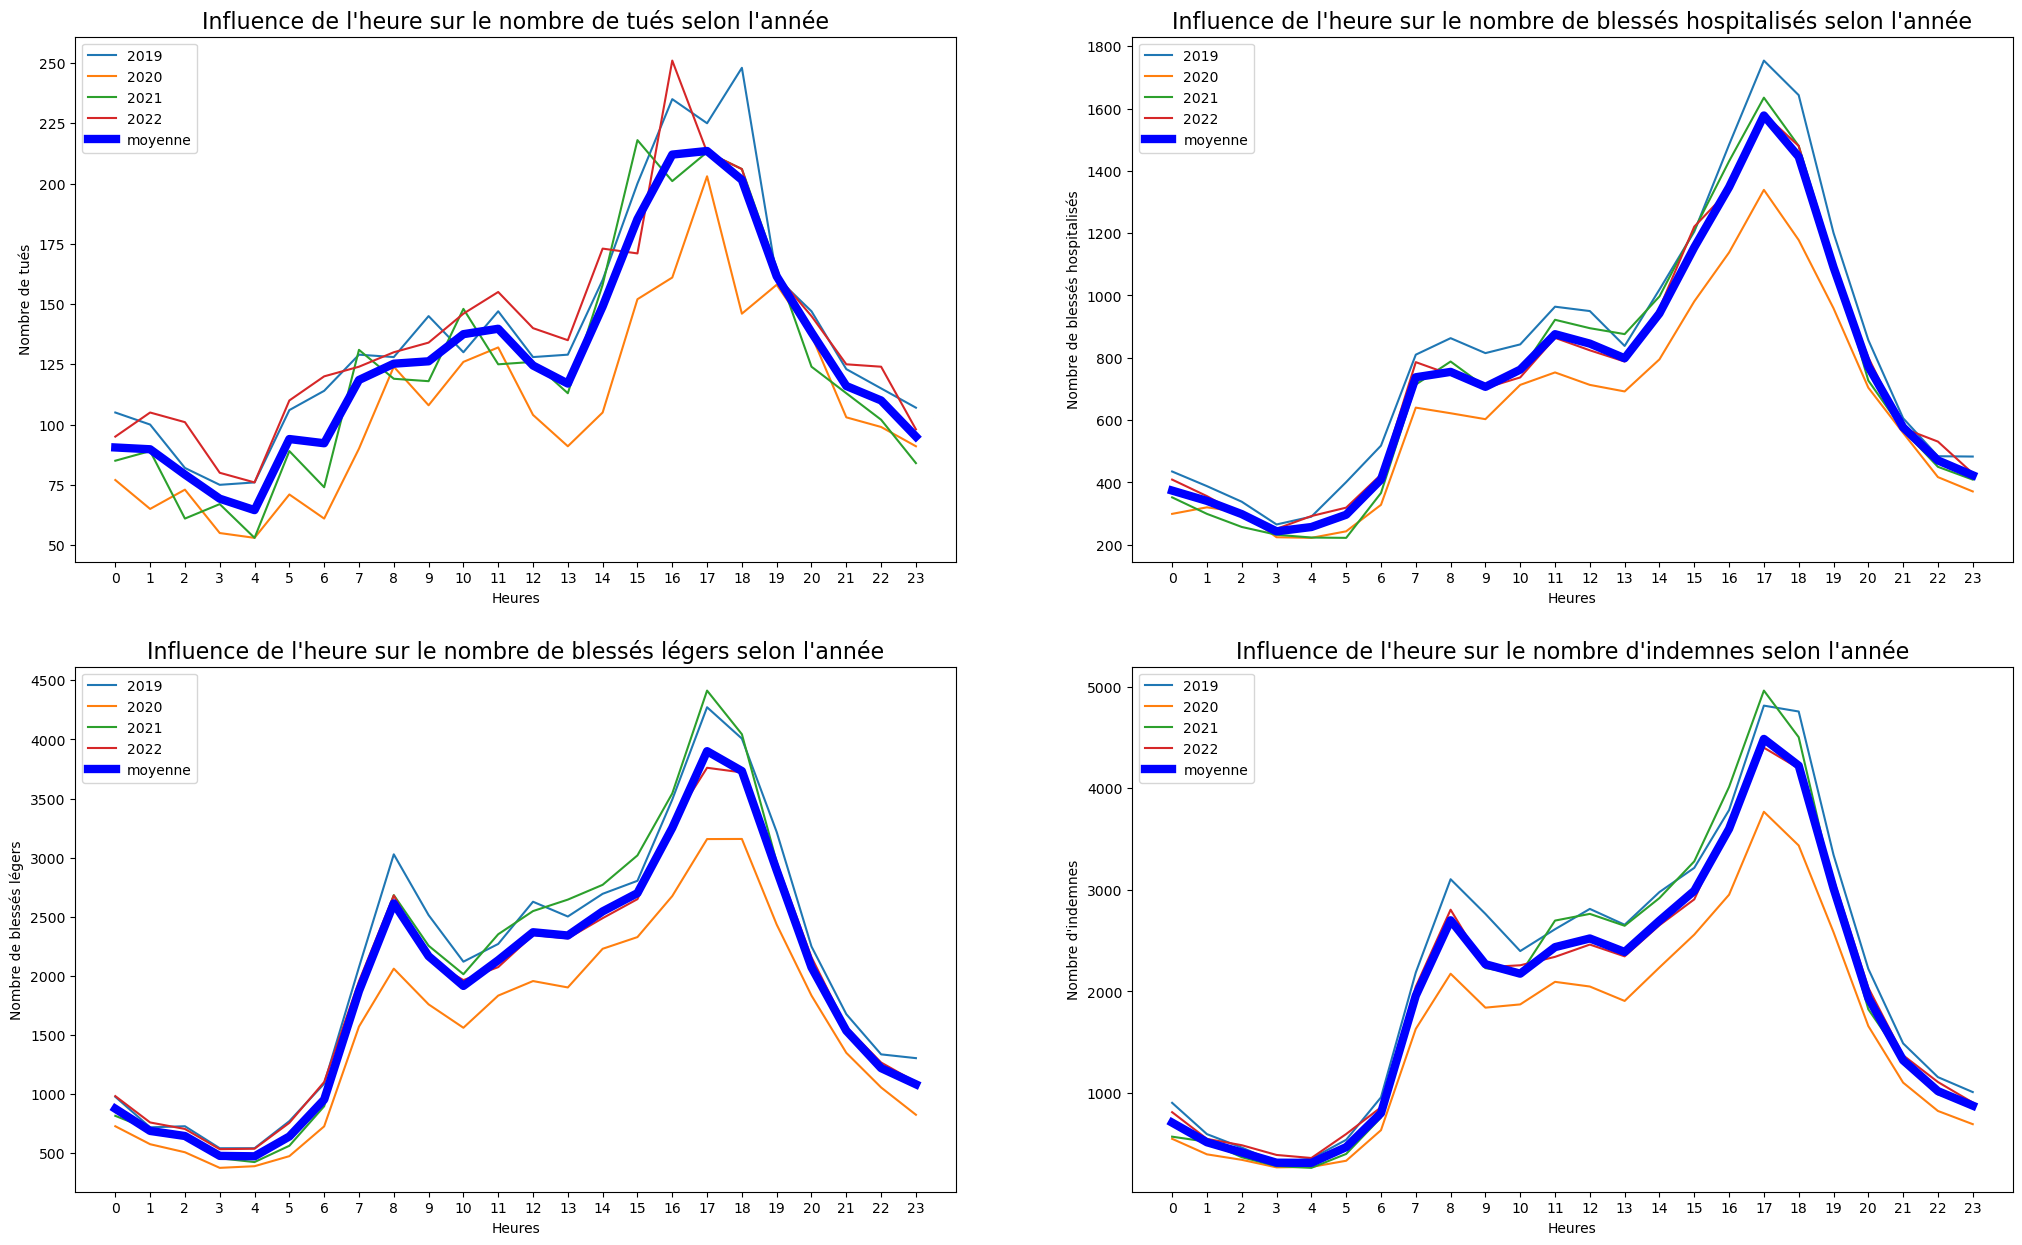

In [187]:
plt.figure(figsize = (25, 15))

#Courbe pour tués
yrs = df_tues['an'].unique()
hours = df_tues['heure'].unique()
color = plt.cm.inferno(np.linspace(0, 1, len(days)))

for i in yrs :
    plt.subplot(2, 2, 1)
    df_tues2 = df_tues.loc[(df_tues['an'] == i)]
    plt.plot(df_tues2['heure'], df_tues2['grav_rec'], label = i)
plt.plot(df_tues_moy['heure'], df_tues_moy['grav_rec'], label = 'moyenne', color = "b", linewidth = 6)
plt.xticks(np.arange(0, 24, 1), np.arange(0, 24, 1))
plt.xlabel('Heures')
plt.ylabel('Nombre de tués')
plt.title("Influence de l'heure sur le nombre de tués selon l'année", fontdict = {'fontsize' : 16})
plt.legend(loc = 'upper left')


#Courbe pour blessés hospitalisés
yrs = df_blesses_h['an'].unique()
hours = df_blesses_h['heure'].unique()
color = plt.cm.inferno(np.linspace(0, 1, len(days)))

for i in yrs :
    plt.subplot(2, 2, 2)
    df_blesses_h2 = df_blesses_h.loc[(df_blesses_h['an'] == i)]
    plt.plot(df_blesses_h2['heure'], df_blesses_h2['grav_rec'], label = i)
plt.plot(df_blesses_h_moy['heure'], df_blesses_h_moy['grav_rec'], label = 'moyenne', color = "b", linewidth = 6)
plt.xticks(np.arange(0, 24, 1), np.arange(0, 24, 1))
plt.xlabel('Heures')
plt.ylabel('Nombre de blessés hospitalisés')
plt.title("Influence de l'heure sur le nombre de blessés hospitalisés selon l'année", fontdict = {'fontsize' : 16})
plt.legend(loc = 'upper left')

#Courbe pour blessés légers
yrs = df_blesses_l['an'].unique()
hours = df_blesses_l['heure'].unique()
color = plt.cm.inferno(np.linspace(0, 1, len(days)))

for i in yrs :
    plt.subplot(2, 2, 3)
    df_blesses_l2 = df_blesses_l.loc[(df_blesses_l['an'] == i)]
    plt.plot(df_blesses_l2['heure'], df_blesses_l2['grav_rec'], label = i)
plt.plot(df_blesses_l_moy['heure'], df_blesses_l_moy['grav_rec'], label = 'moyenne', color = "b", linewidth = 6)
plt.xticks(np.arange(0, 24, 1), np.arange(0, 24, 1))
plt.xlabel('Heures')
plt.ylabel('Nombre de blessés légers')
plt.title("Influence de l'heure sur le nombre de blessés légers selon l'année", fontdict = {'fontsize' : 16})
plt.legend(loc = 'upper left')

#Courbe pour indemnes
yrs = df_indemnes['an'].unique()
hours = df_indemnes['heure'].unique()
color = plt.cm.inferno(np.linspace(0, 1, len(days)))

for i in yrs :
    plt.subplot(2, 2, 4)
    df_indemnes2 = df_indemnes.loc[(df_indemnes['an'] == i)]
    plt.plot(df_indemnes2['heure'], df_indemnes2['grav_rec'], label = i )
plt.plot(df_indemnes_moy['heure'], df_indemnes_moy['grav_rec'], label = 'moyenne', color = "b", linewidth = 6)
plt.xticks(np.arange(0, 24, 1), np.arange(0, 24, 1))
plt.xlabel('Heures')
plt.ylabel("Nombre d'indemnes")
plt.title("Influence de l'heure sur le nombre d'indemnes selon l'année", fontdict = {'fontsize' : 16})
plt.legend(loc = 'upper left')

plt.show()